#### Data

* Fuel consumption and CO_2 emission

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

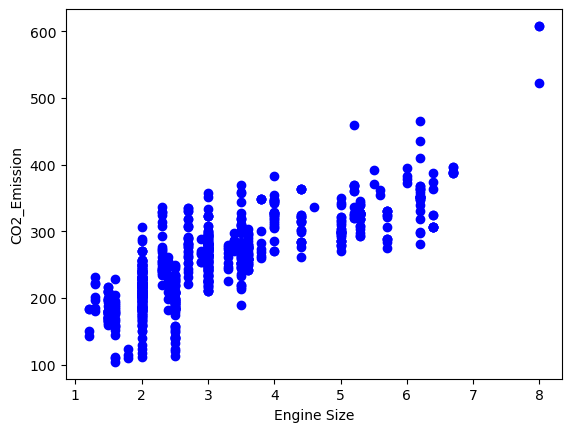

In [3]:


df = pd.read_csv("D:\Sajjad Ahmad\Jupyter Projects\QML\Fuel Consumption Ratings.csv", encoding = 'latin-1')

'Taking a look at the data'
# df.head()

'Describing data'
# df.describe()

'Selecting some features'
cdf = df[['Engine_Size', 'CO2_Emissions']]

# cdf.head(10)



"""
Drawing a scatter plot:
1. Engine Size Vs Emission of CO2

"""

plt.scatter(cdf.Engine_Size, cdf.CO2_Emissions, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2_Emission')
plt.show()

* Dataset 

<h1 align='center'><font size=2> \begin{equation} data = \begin{bmatrix}
X ~~(Engine~~ Size) \\
Y ~~(CO2~~ Emission)
\end{bmatrix} \end{equation}  </font></h1>

* The hypothesis function:

<h1 align='center'><font size=3>$h(\theta) = \theta_0 + \theta_1 X$ </font></h1> ; $\theta_0$ is the initial value

* Mean square error (MQE) function:
<h1 align='center'><font size=3>$C(\theta) = \frac{1}{2m} \left( h(\theta) - Y \right)^{2}$ </font></h1> ; where m is the number of examples

By putting the hypothesis function above function the MSE func will be

<h1 align='center'><font size=3>$C(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(\theta_0 + \theta_1 x^i - y^i \right)^{2}$ </font></h1>

This function will be used as a cost function to be minimized for the value of $\theta$ using gradient descent method


#### Gradient descent

<h1 align='center'><font size=3>$ \theta (n+1) = \theta(n) - \alpha \nabla C(\theta)$ </font></h1>

<h1 align='center'><font size=3>$  \nabla C(\theta) = \begin{bmatrix} \frac{\partial C}{\partial \theta_0} \\
\frac{\partial C}{\partial \theta_1}  \end{bmatrix}$ </font></h1>

<h1 align='center'><font size=3>$  \nabla C(\theta) = \begin{bmatrix} \frac{1}{m} \sum_{i=1}^{m} \left(\theta_0 + \theta_1 x^i - y^i \right) \\
\frac{1}{m} \sum_{i=1}^{m} \left(\theta_0 + \theta_1 x^i - y^i \right)\theta_1  \end{bmatrix}$ </font></h1>

##### Splitting the dataset

* Splitting dataset into train and test sets: 80% data for training and 20% for testing

In [8]:
'Splitting dataset into train and test sets: 80% data for training and 20% for testing'
msk = np.random.rand(len(df)) < 0.8   #it creates an array of Boleans True and False of the length of data set
train = cdf[msk]
test = cdf[~msk]

train_x = np.asanyarray(train[['Engine_Size']])
train_y = np.asanyarray(train[['CO2_Emissions']])

In [17]:
tol=1e-6

In [18]:
!git pull origin main

Already up to date.


From https://github.com/Sajjad-Ahmad-phy/Final-Year-Project
 * branch            main       -> FETCH_HEAD


In [ ]:
!git add .
!git commit -m "Your commit message"

In [ ]:
!git push -u origin main